# Exploring Security Practices in Infrastructure as Code: An Empirical Study of AWS Terraform Configurations

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.dpi'] = 300

In [11]:
RESULTS_FILE_AZURE = "./csv/azure_results.csv"
RESULTS_FILE_TFSEC = "./csv/azure_results_tfsec.csv"
POLICIES_FILE = "./csv/policies-azure-final.csv"

In [12]:
policies_tfsec = {}
policies_checkov = {}
with open(POLICIES_FILE, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        if s_row[7] != "-" and s_row[8] != "-" and s_row[9] == "":
            policy_id = s_row[0]
            pol_tfsec = s_row[7]
            pol_checkov = s_row[8]

            policies_tfsec[policy_id] = pol_tfsec.split(',')
            policies_checkov[policy_id] = pol_checkov.split(',')

print(policies_tfsec)
print(policies_checkov)

{'POL03': ['AVD-AZU-0051'], 'POL04': ['AVD-AZU-0047'], 'POL08': ['AVD-AZU-0007'], 'POL10': ['AVD-AZU-0011'], 'POL12': ['AVD-AZU-0013'], 'POL15': ['AVD-AZU-0040'], 'POL16': ['AVD-AZU-0042'], 'POL17': ['AVD-AZU-0002'], 'POL19': ['AVD-AZU-0005'], 'POL20': ['AVD-AZU-0004'], 'POL22': ['AVD-AZU-0006'], 'POL24': ['AVD-AZU-0038'], 'POL25': ['AVD-AZU-0037'], 'POL26': ['AVD-AZU-0036'], 'POL28': ['AVD-AZU-0027'], 'POL32': ['AVD-AZU-0022'], 'POL34': ['AVD-AZU-0024'], 'POL35': ['AVD-AZU-0019']}
{'POL03': [''], 'POL04': [''], 'POL08': ['CKV2_AZURE_8'], 'POL10': ['CKV_AZURE_44'], 'POL12': ['CKV_AZURE_189'], 'POL15': ['CKV_AZURE_4'], 'POL16': ['CKV_AZURE_5'], 'POL17': [''], 'POL19': ['CKV_AZURE_18'], 'POL20': ['CKV_AZURE_70'], 'POL22': ['CKV_AZURE_15'], 'POL24': ['CKV_AZURE_2'], 'POL25': ['CKV_AZURE_45'], 'POL26': ['CKV_AZURE_105'], 'POL28': [''], 'POL32': ['CKV_AZURE_11'], 'POL34': ['CKV_AZURE_30'], 'POL35': ['CKV_AZURE_31']}


In [13]:
results_tfsec = {}
results_checkov = {}
with open(RESULTS_FILE_TFSEC, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        repo_name = s_row[0]
        passed_check = s_row[3].split(";")
        failed_check = s_row[4].split(";")

        results_tfsec[repo_name] = [passed_check, failed_check]

with open(RESULTS_FILE_AZURE, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        repo_name = s_row[0]
        passed_check = s_row[3].split(";")
        failed_check = s_row[4].split(";")

        results_checkov[repo_name] = [passed_check, failed_check]

print(results_tfsec)


{'openshift/installer': [[''], ['']], 'kubermatic/kubeone': [['AVD-AWS-0099', 'AVD-AWS-0099', 'AVD-AWS-0099', 'AVD-AWS-0124', 'AVD-AWS-0124', 'AVD-AWS-0124', 'AVD-AWS-0124', 'AVD-AWS-0124', 'AVD-AWS-0124', 'AVD-AWS-0107', 'AVD-AWS-0029', 'AVD-AWS-0029', 'AVD-AWS-0029', 'AVD-AWS-0029', 'AVD-AWS-0099', 'AVD-AWS-0099', 'AVD-AWS-0099', 'AVD-AWS-0124', 'AVD-AWS-0124', 'AVD-AWS-0124', 'AVD-AWS-0124', 'AVD-AWS-0124', 'AVD-AWS-0124', 'AVD-AWS-0107', 'AVD-AWS-0029', 'AVD-AWS-0029', 'AVD-AWS-0029', 'AVD-AWS-0029', 'AVD-AZU-0039', 'AVD-AZU-0039', 'AVD-AZU-0039', 'AVD-AZU-0037', 'AVD-AZU-0037', 'AVD-AZU-0037', 'AVD-AZU-0048', 'AVD-AZU-0048', 'AVD-AZU-0051', 'AVD-DIG-0002', 'AVD-DIG-0004', 'AVD-DIG-0004', 'AVD-DIG-0004', 'AVD-GCP-0037', 'AVD-GCP-0037', 'AVD-GCP-0037', 'AVD-GCP-0043', 'AVD-GCP-0043', 'AVD-GCP-0043', 'AVD-GCP-0036', 'AVD-GCP-0036', 'AVD-GCP-0036', 'AVD-GCP-0027', 'AVD-GCP-0027', 'AVD-GCP-0027', 'AVD-GCP-0032', 'AVD-GCP-0032', 'AVD-GCP-0032', 'AVD-OPNSTK-0001', 'AVD-OPNSTK-0001', 'AVD

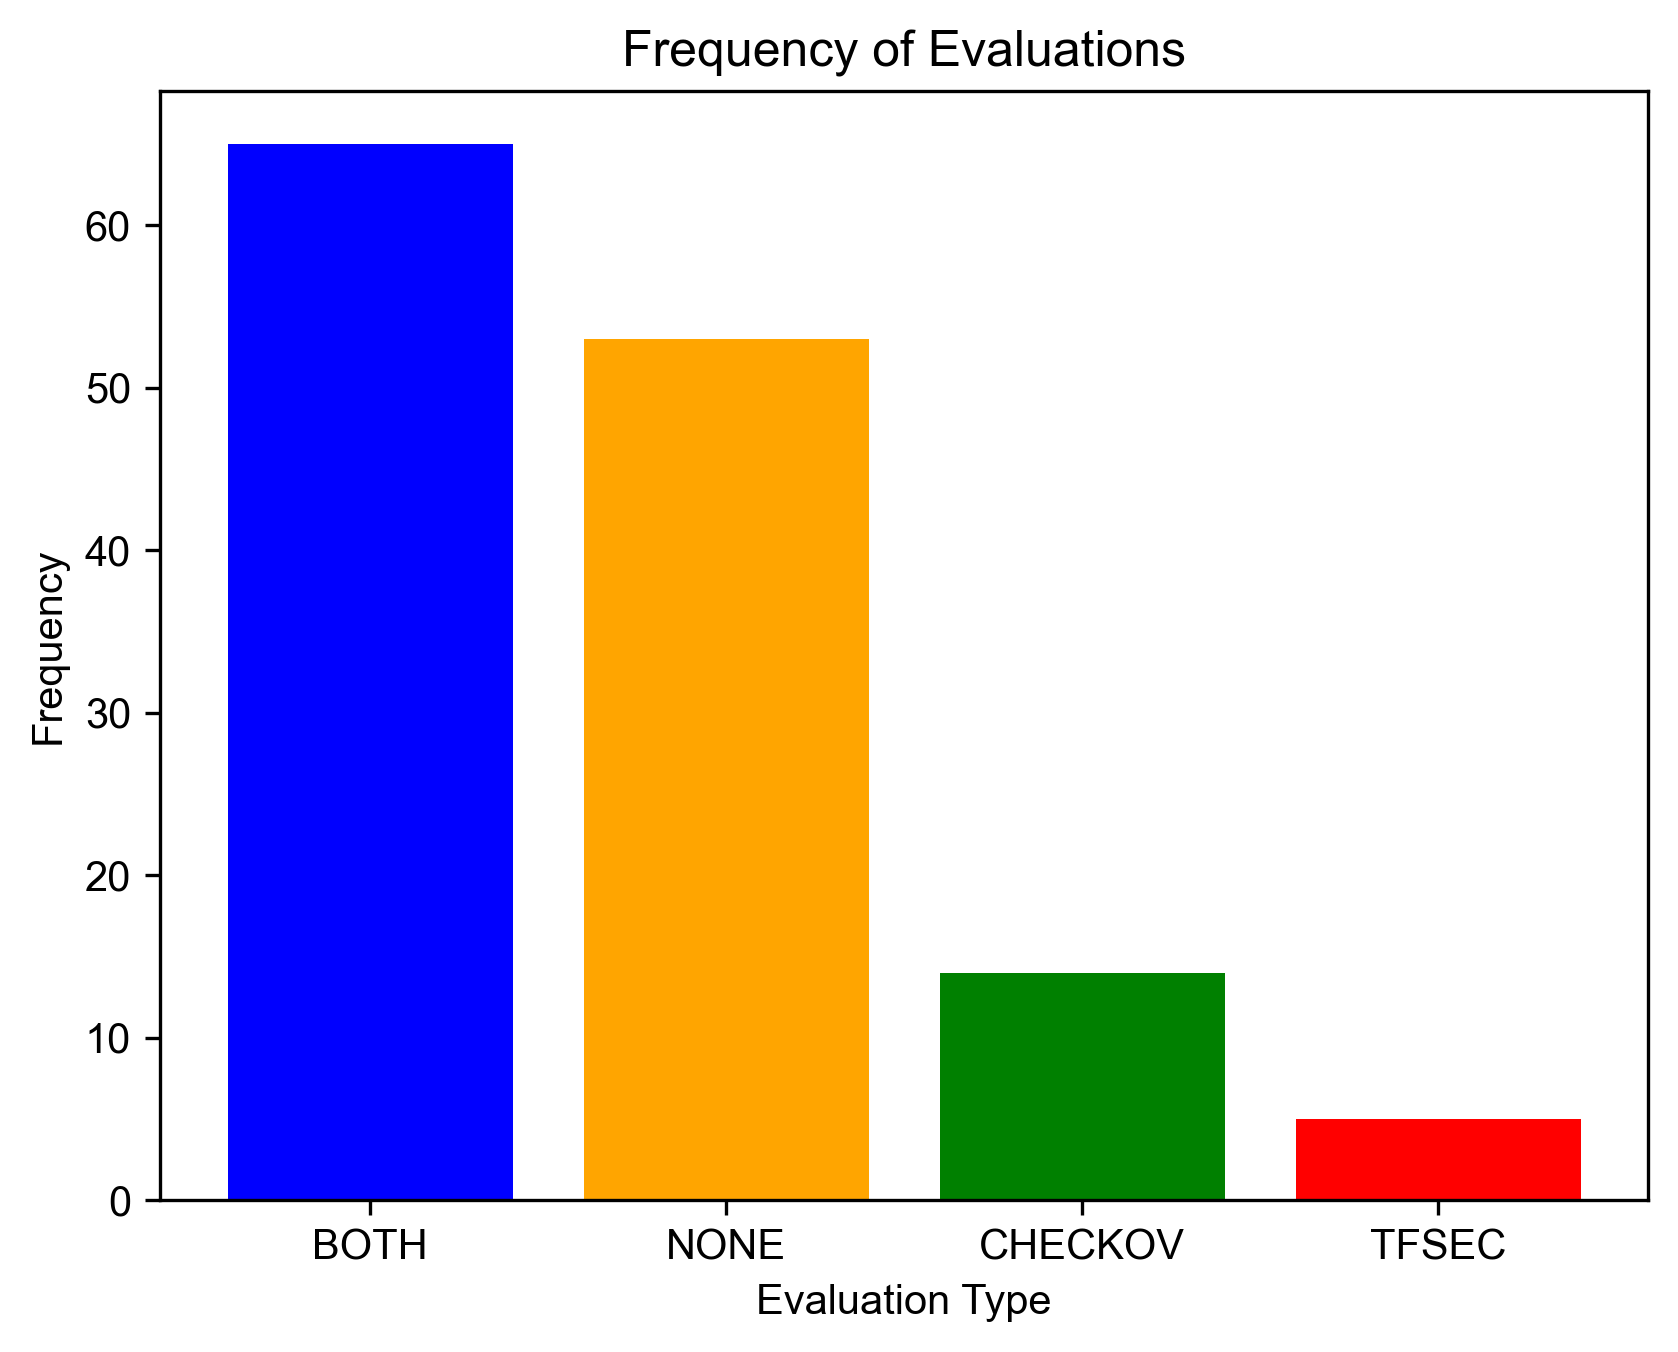

In [14]:
output = []
for project in results_checkov:
    result_project_tfsec = results_tfsec.get(project)
    result_project_checkov = results_checkov.get(project)
    if result_project_tfsec is not None and result_project_checkov is not None:
        for policy in policies_tfsec:
            tfsec_pol_id = policies_tfsec.get(policy)[0]
            checkov_pol_id = policies_checkov.get(policy)[0]
            evaluation = ""
            if checkov_pol_id in result_project_checkov[0] and tfsec_pol_id in result_project_tfsec[0]:
                evaluation = "BOTH"
            if checkov_pol_id in result_project_checkov[0] and tfsec_pol_id in result_project_tfsec[1]:
                evaluation = "CHECKOV"
            if checkov_pol_id in result_project_checkov[1] and tfsec_pol_id in result_project_tfsec[0]:
                evaluation = "TFSEC"
            if checkov_pol_id in result_project_checkov[1] and tfsec_pol_id in result_project_tfsec[1]:
                evaluation = "NONE"

            if evaluation != "":
                output.append([project, policy, evaluation])

import matplotlib.pyplot as plt

# Count the frequency of each evaluation
evaluation_counts = {}
for project_name, policy_id, evaluation in output:
    if evaluation in evaluation_counts:
        evaluation_counts[evaluation] += 1
    else:
        evaluation_counts[evaluation] = 1

# Prepare data for plotting
evaluations = list(evaluation_counts.keys())
counts = list(evaluation_counts.values())

# Create the bar chart
plt.bar(evaluations, counts, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Evaluation Type')
plt.ylabel('Frequency')
plt.title('Frequency of Evaluations')
plt.show()


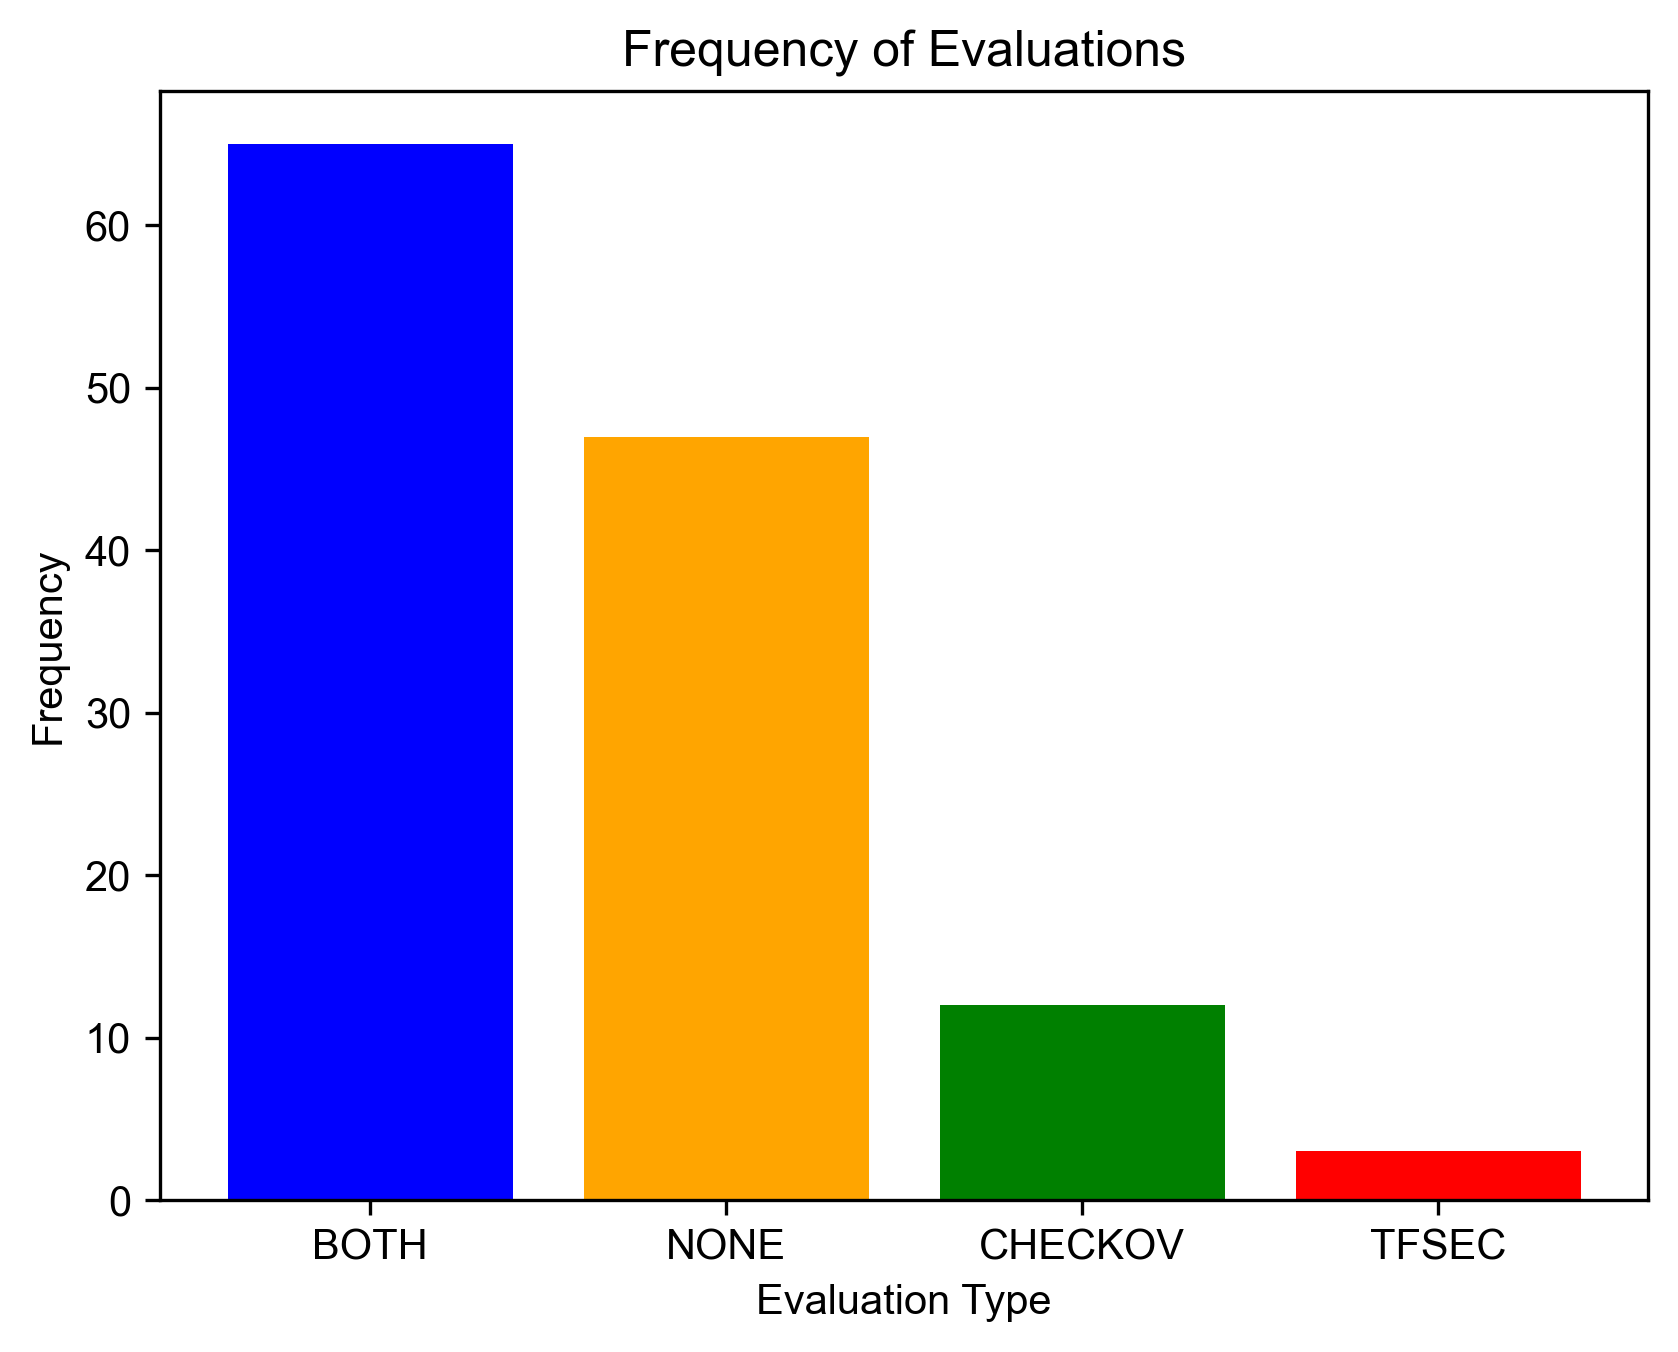

CSV file 'distribution_by_coverage_azure.csv' has been created.


In [15]:
results_tfsec = {}
results_checkov = {}
with open(RESULTS_FILE_TFSEC, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        repo_name = s_row[0]
        passed_check = s_row[3].split(";")
        failed_check = s_row[4].split(";")

        results_tfsec[repo_name] = [passed_check, failed_check]

with open(RESULTS_FILE_AZURE, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        repo_name = s_row[0]
        passed_check = s_row[3].split(";")
        failed_check = s_row[4].split(";")

        results_checkov[repo_name] = [passed_check, failed_check]

output = []
for project in results_checkov:
    result_project_tfsec = results_tfsec.get(project)
    result_project_checkov = results_checkov.get(project)
    if result_project_tfsec is not None and result_project_checkov is not None:
        for policy in policies_tfsec:
            tfsec_pol_id = policies_tfsec.get(policy)[0]
            checkov_pol_id = policies_checkov.get(policy)[0]
            evaluation = ""
            if (checkov_pol_id in result_project_checkov[0] and not checkov_pol_id in result_project_checkov[1]) \
                    and (tfsec_pol_id in result_project_tfsec[0] and not tfsec_pol_id in result_project_tfsec[1]):
                evaluation = "BOTH"
            if (checkov_pol_id in result_project_checkov[0] and not checkov_pol_id in result_project_checkov[1]) \
                        and (tfsec_pol_id in result_project_tfsec[1] and not tfsec_pol_id in result_project_tfsec[0]):
                evaluation = "CHECKOV"
            if (checkov_pol_id in result_project_checkov[1] and not checkov_pol_id in result_project_checkov[0]) \
                    and (tfsec_pol_id in result_project_tfsec[0] and not tfsec_pol_id in result_project_tfsec[1]):
                evaluation = "TFSEC"
            if (checkov_pol_id in result_project_checkov[1] and not checkov_pol_id in result_project_checkov[0]) \
                    and (tfsec_pol_id in result_project_tfsec[1] and not tfsec_pol_id in result_project_tfsec[0]):
                evaluation = "NONE"

            if evaluation != "":
                output.append([project, policy, evaluation])

import matplotlib.pyplot as plt

# Count the frequency of each evaluation
evaluation_counts = {}
for project_name, policy_id, evaluation in output:
    if evaluation in evaluation_counts:
        evaluation_counts[evaluation] += 1
    else:
        evaluation_counts[evaluation] = 1

# Prepare data for plotting
evaluations = list(evaluation_counts.keys())
counts = list(evaluation_counts.values())

# Create the bar chart
plt.bar(evaluations, counts, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Evaluation Type')
plt.ylabel('Frequency')
plt.title('Frequency of Evaluations')
plt.show()

import csv

with open('./csv/distribution_by_coverage_azure.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write header
    writer.writerow(['Project Name', 'Policy ID', 'Evaluation'])

    # Write data
    writer.writerows(output)

print("CSV file 'distribution_by_coverage_azure.csv' has been created.")

In [21]:
POLICIES_FILE = "./csv/azure_policies.csv"

categories = {}
policies = {}
p_names = {}
with open(POLICIES_FILE, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        if s_row[5] == "TRUE":
            policy_id = s_row[1]
            policy_name = s_row[3]
            policy_description = s_row[4]
            policy_category = s_row[6].strip('\n')
            if policy_category == "":
                policy_category = "Uncategorized"
            
            if categories.get(policy_category) is not None:
                categories.get(policy_category).append(policy_id)
            else:
                categories[policy_category] = [policy_id]
            
            policies[policy_id] = policy_description
            p_names[policy_id] = policy_name
            
print(categories)

{'Access policy': ['CKV_AZURE_1', 'CKV_AZURE_9', 'CKV_AZURE_10', 'CKV_AZURE_34', 'CKV_AZURE_48', 'CKV_AZURE_49', 'CKV_AZURE_53', 'CKV_AZURE_59', 'CKV_AZURE_68', 'CKV_AZURE_77', 'CKV_AZURE_89', 'CKV_AZURE_101', 'CKV_AZURE_104', 'CKV_AZURE_106', 'CKV_AZURE_108', 'CKV_AZURE_113', 'CKV_AZURE_120', 'CKV_AZURE_121', 'CKV_AZURE_124', 'CKV_AZURE_139', 'CKV_AZURE_160', 'CKV_AZURE_162', 'CKV_AZURE_204', 'CKV2_AZURE_6', 'CKV2_AZURE_8'], 'Admin by default': ['CKV_AZURE_137', 'CKV_AZURE_141'], 'Encryption at rest': ['CKV_AZURE_2', 'CKV_AZURE_73', 'CKV_AZURE_74', 'CKV_AZURE_93', 'CKV_AZURE_96', 'CKV_AZURE_97', 'CKV_AZURE_105', 'CKV_AZURE_117', 'CKV_AZURE_130', 'CKV_AZURE_151', 'CKV2_AZURE_1', 'CKV2_AZURE_14', 'CKV2_AZURE_15', 'CKV2_AZURE_16', 'CKV2_AZURE_17', 'CKV2_AZURE_18'], 'Encryption in transit': ['CKV_AZURE_3', 'CKV_AZURE_14', 'CKV_AZURE_28', 'CKV_AZURE_29', 'CKV_AZURE_47', 'CKV_AZURE_70', 'CKV_AZURE_153', 'CKV_AZURE_161', 'CKV_AZURE_178', 'CKV_AZURE_197', 'CKV_AZURE_198', 'CKV_AZURE_15', 'CKV

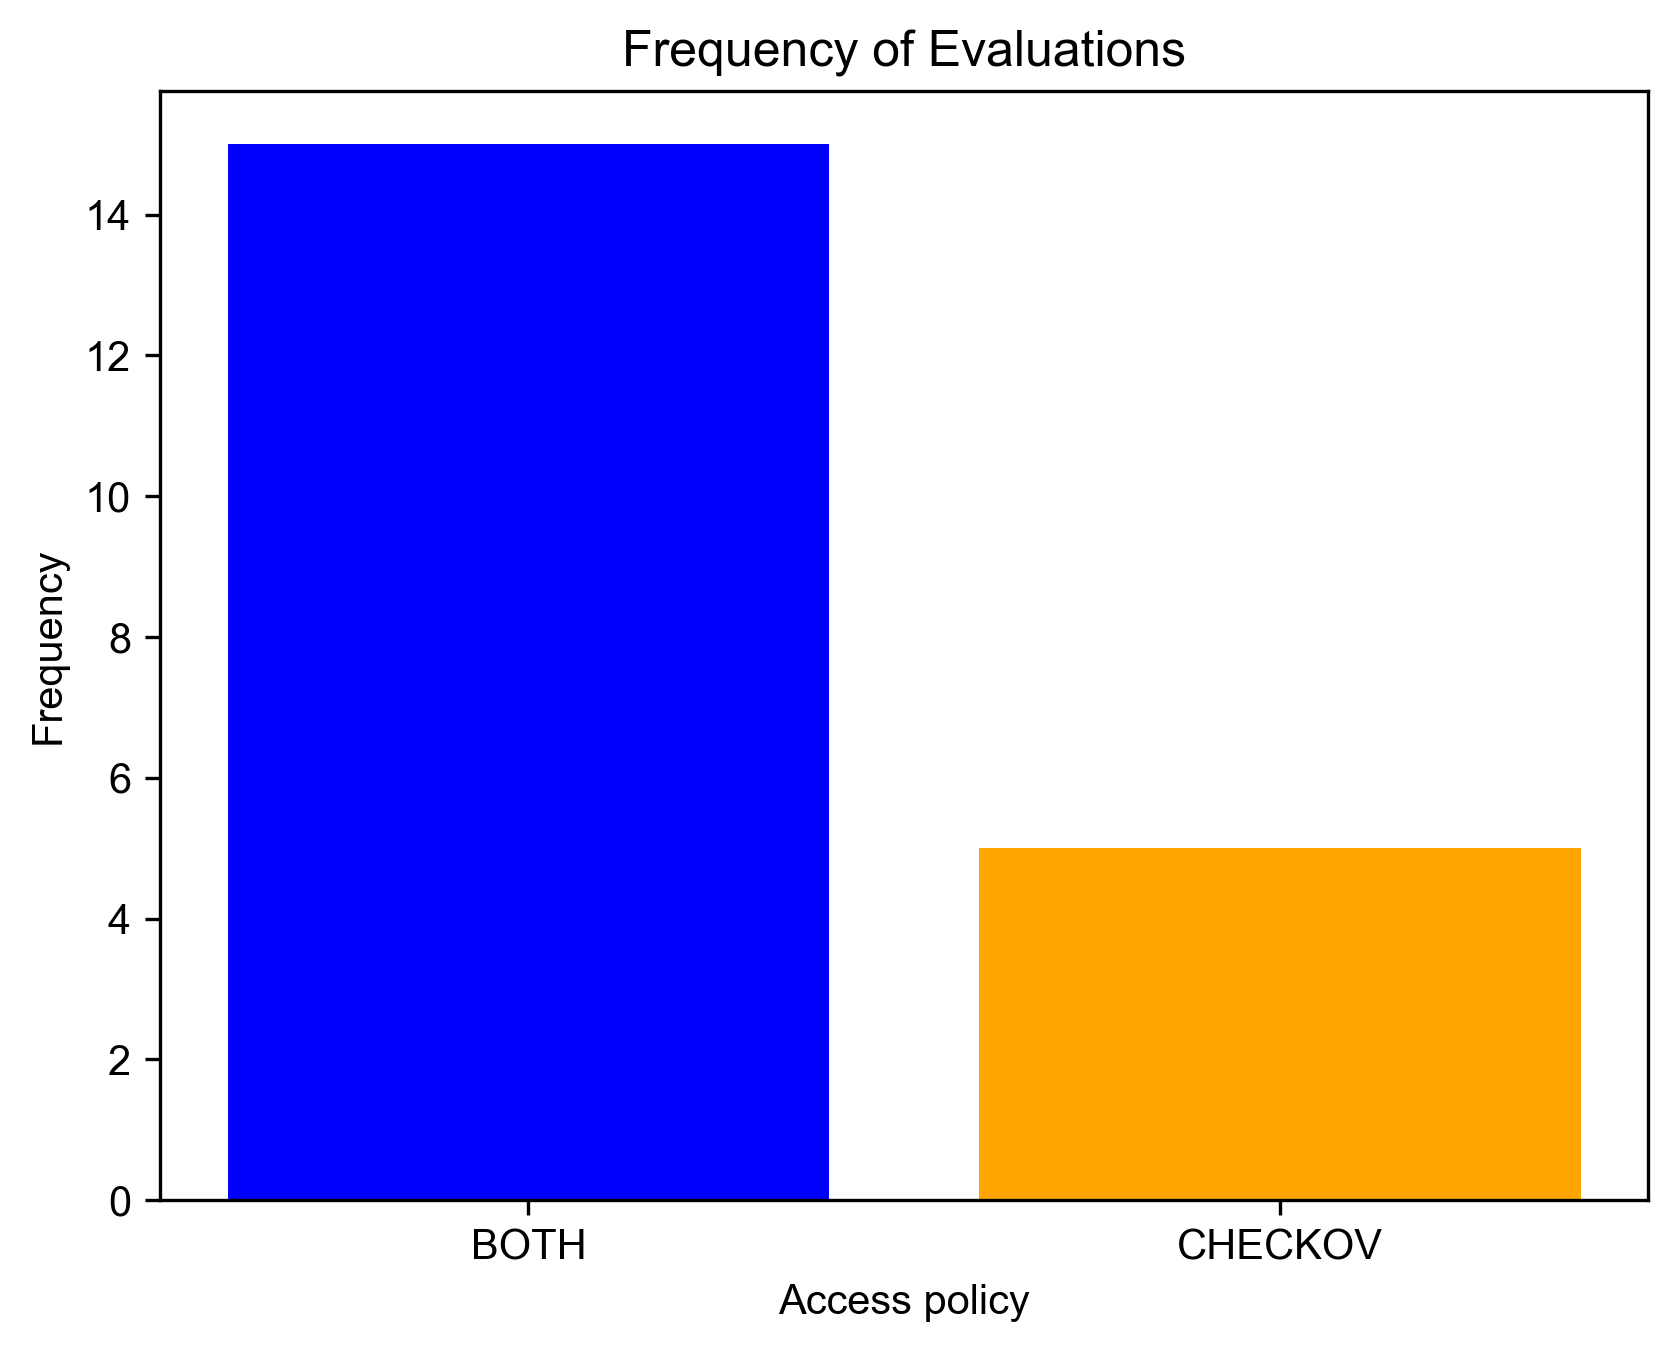

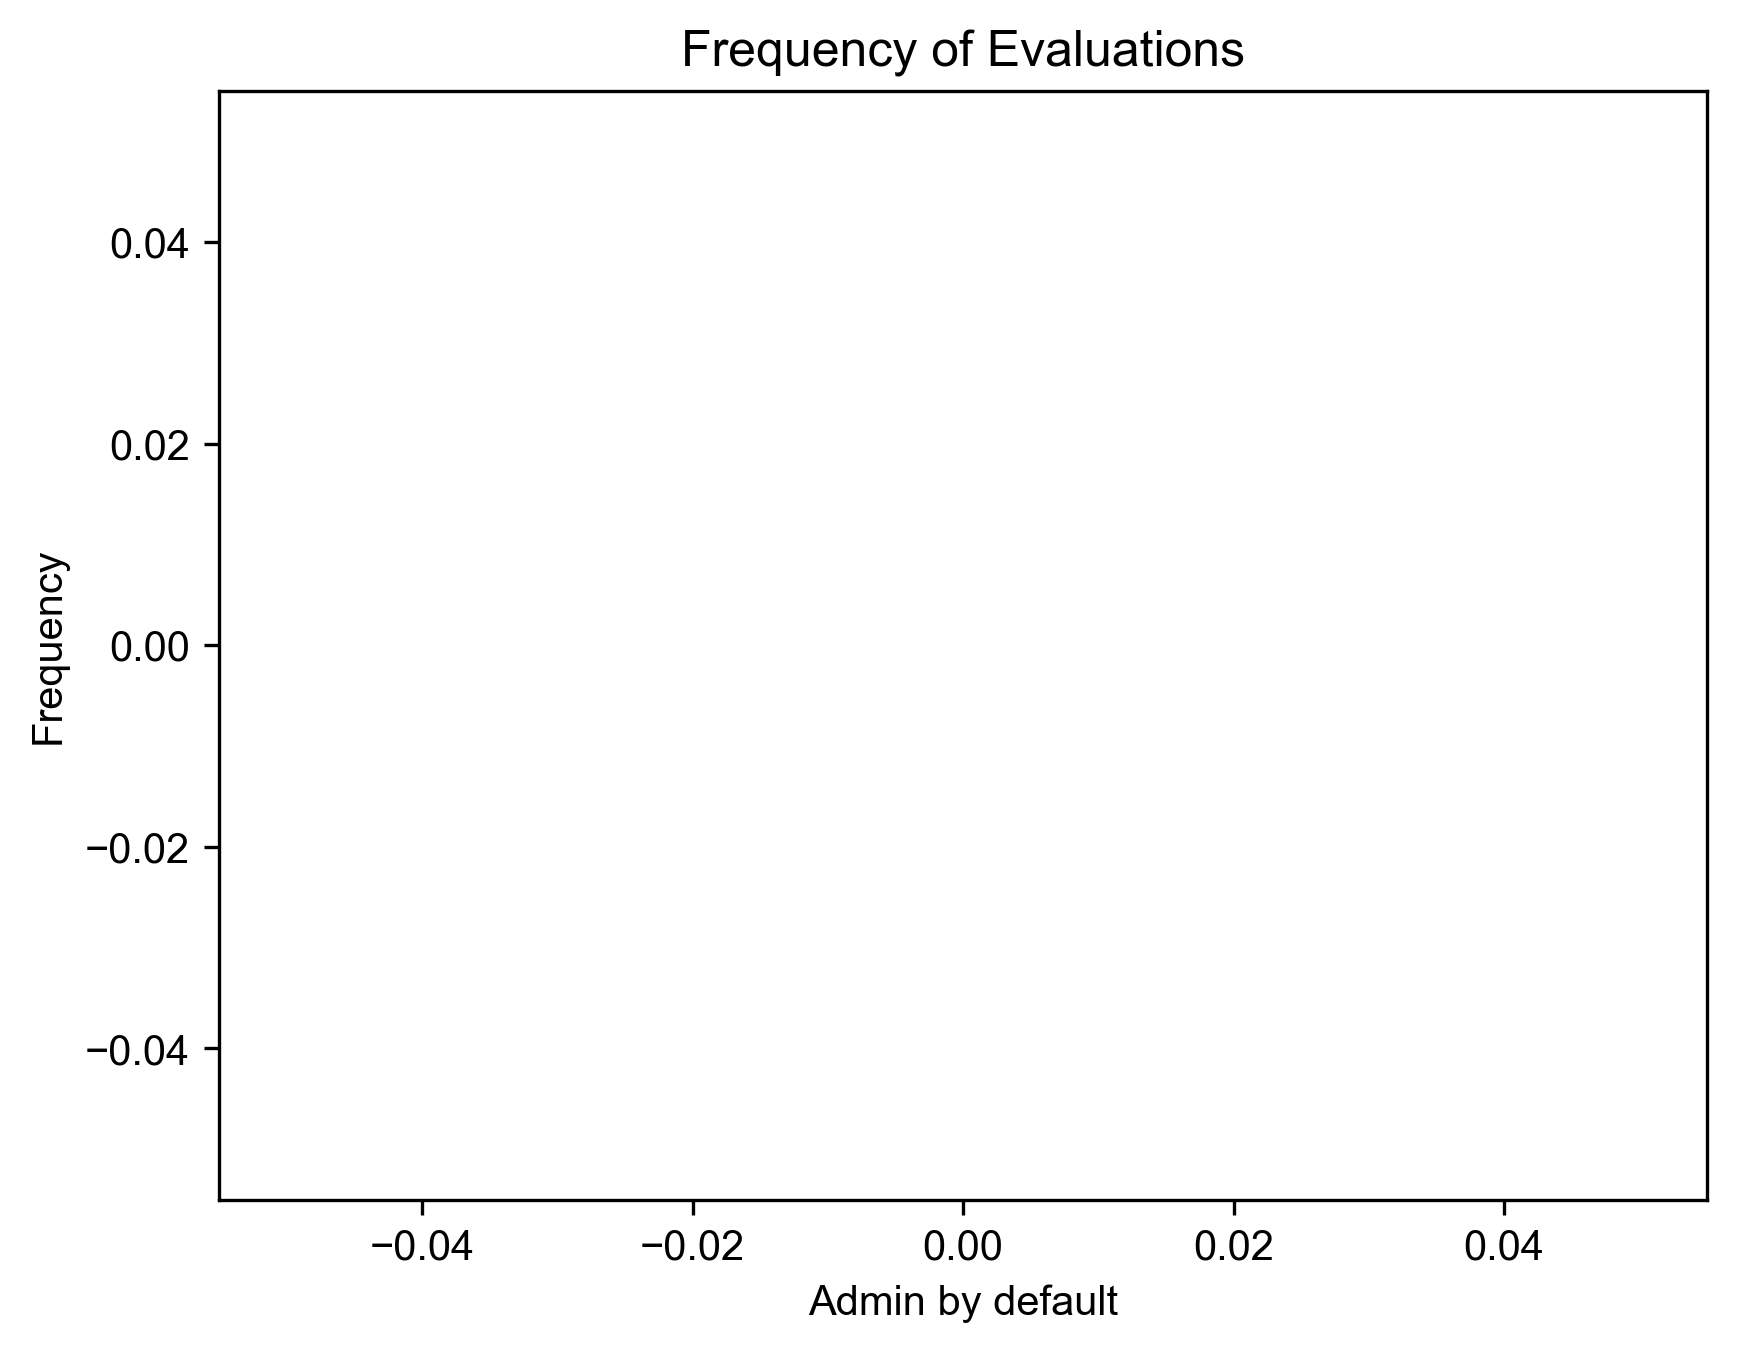

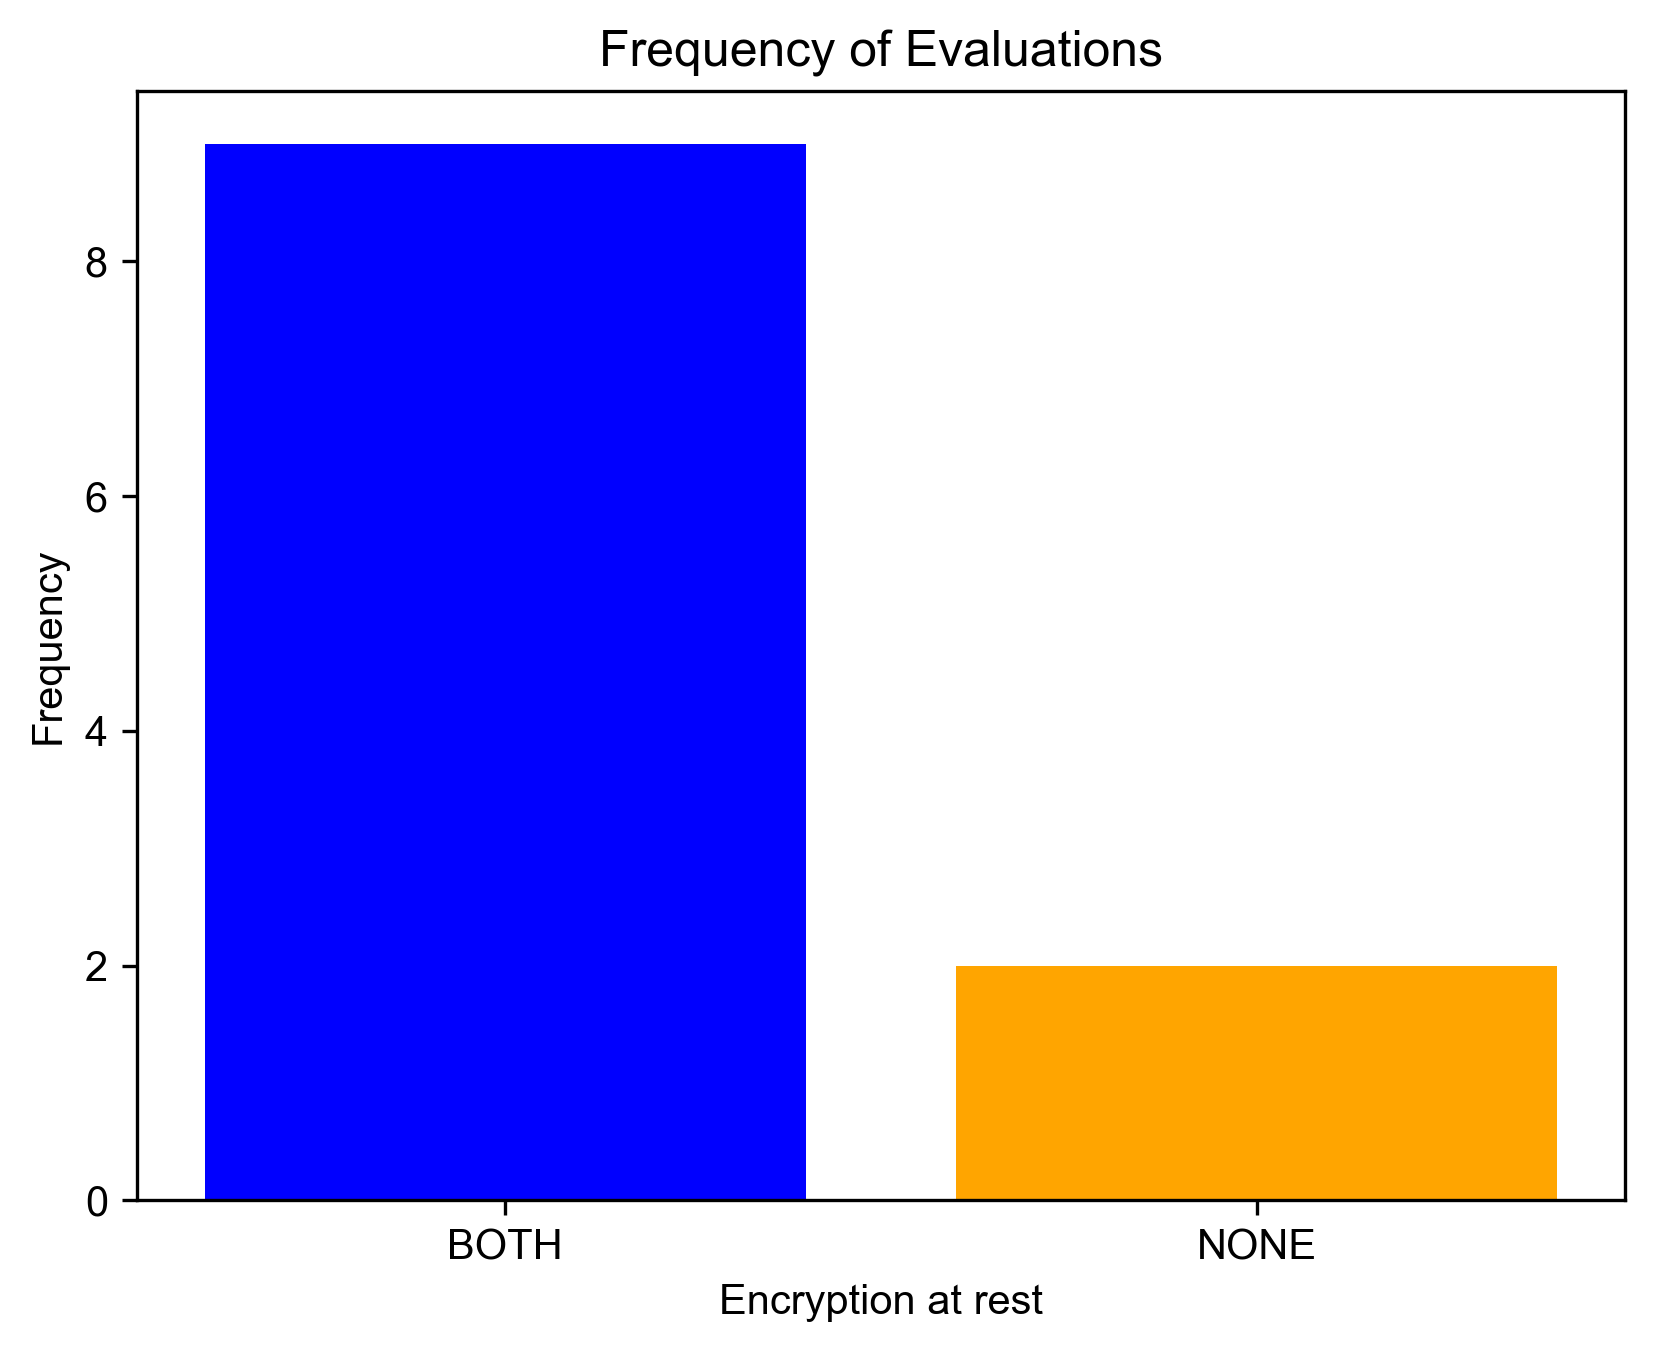

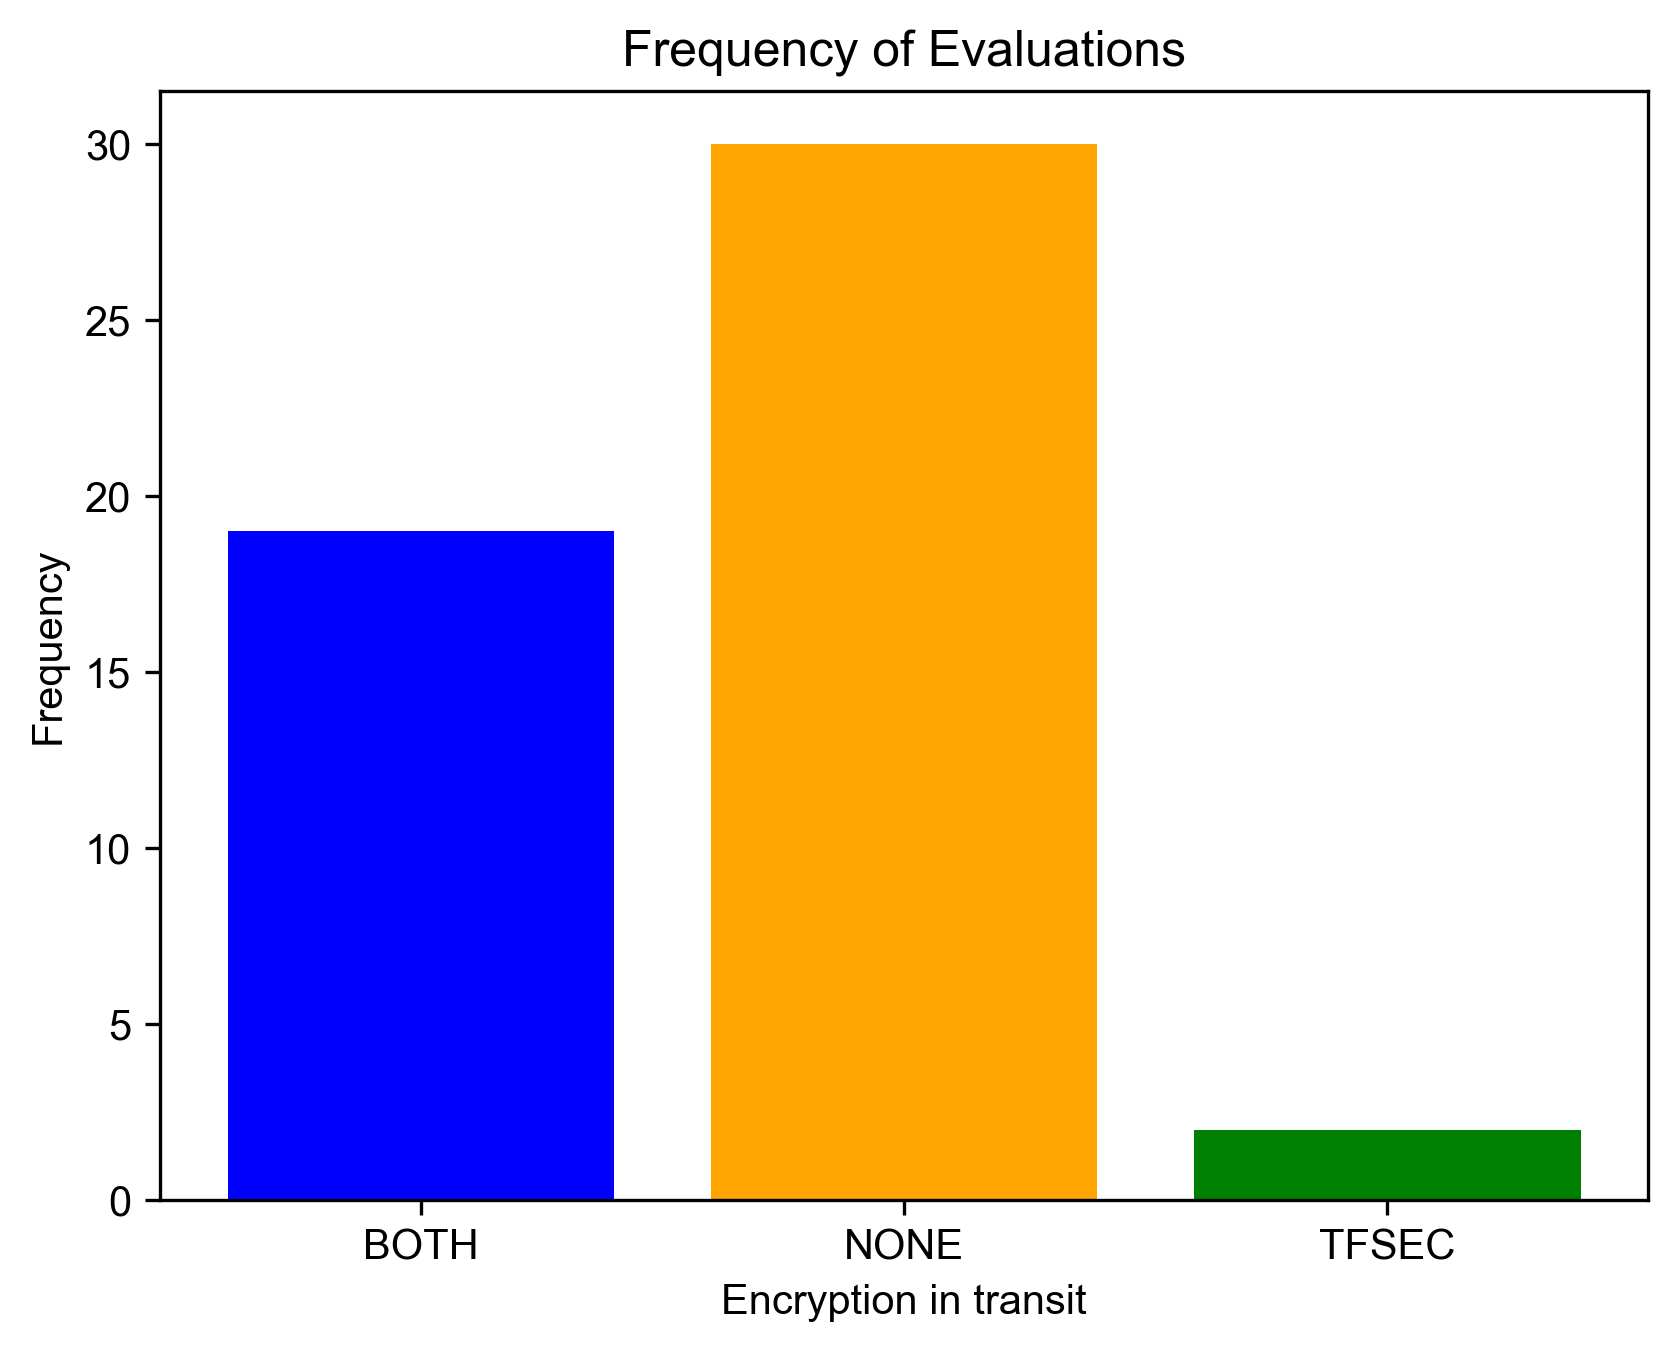

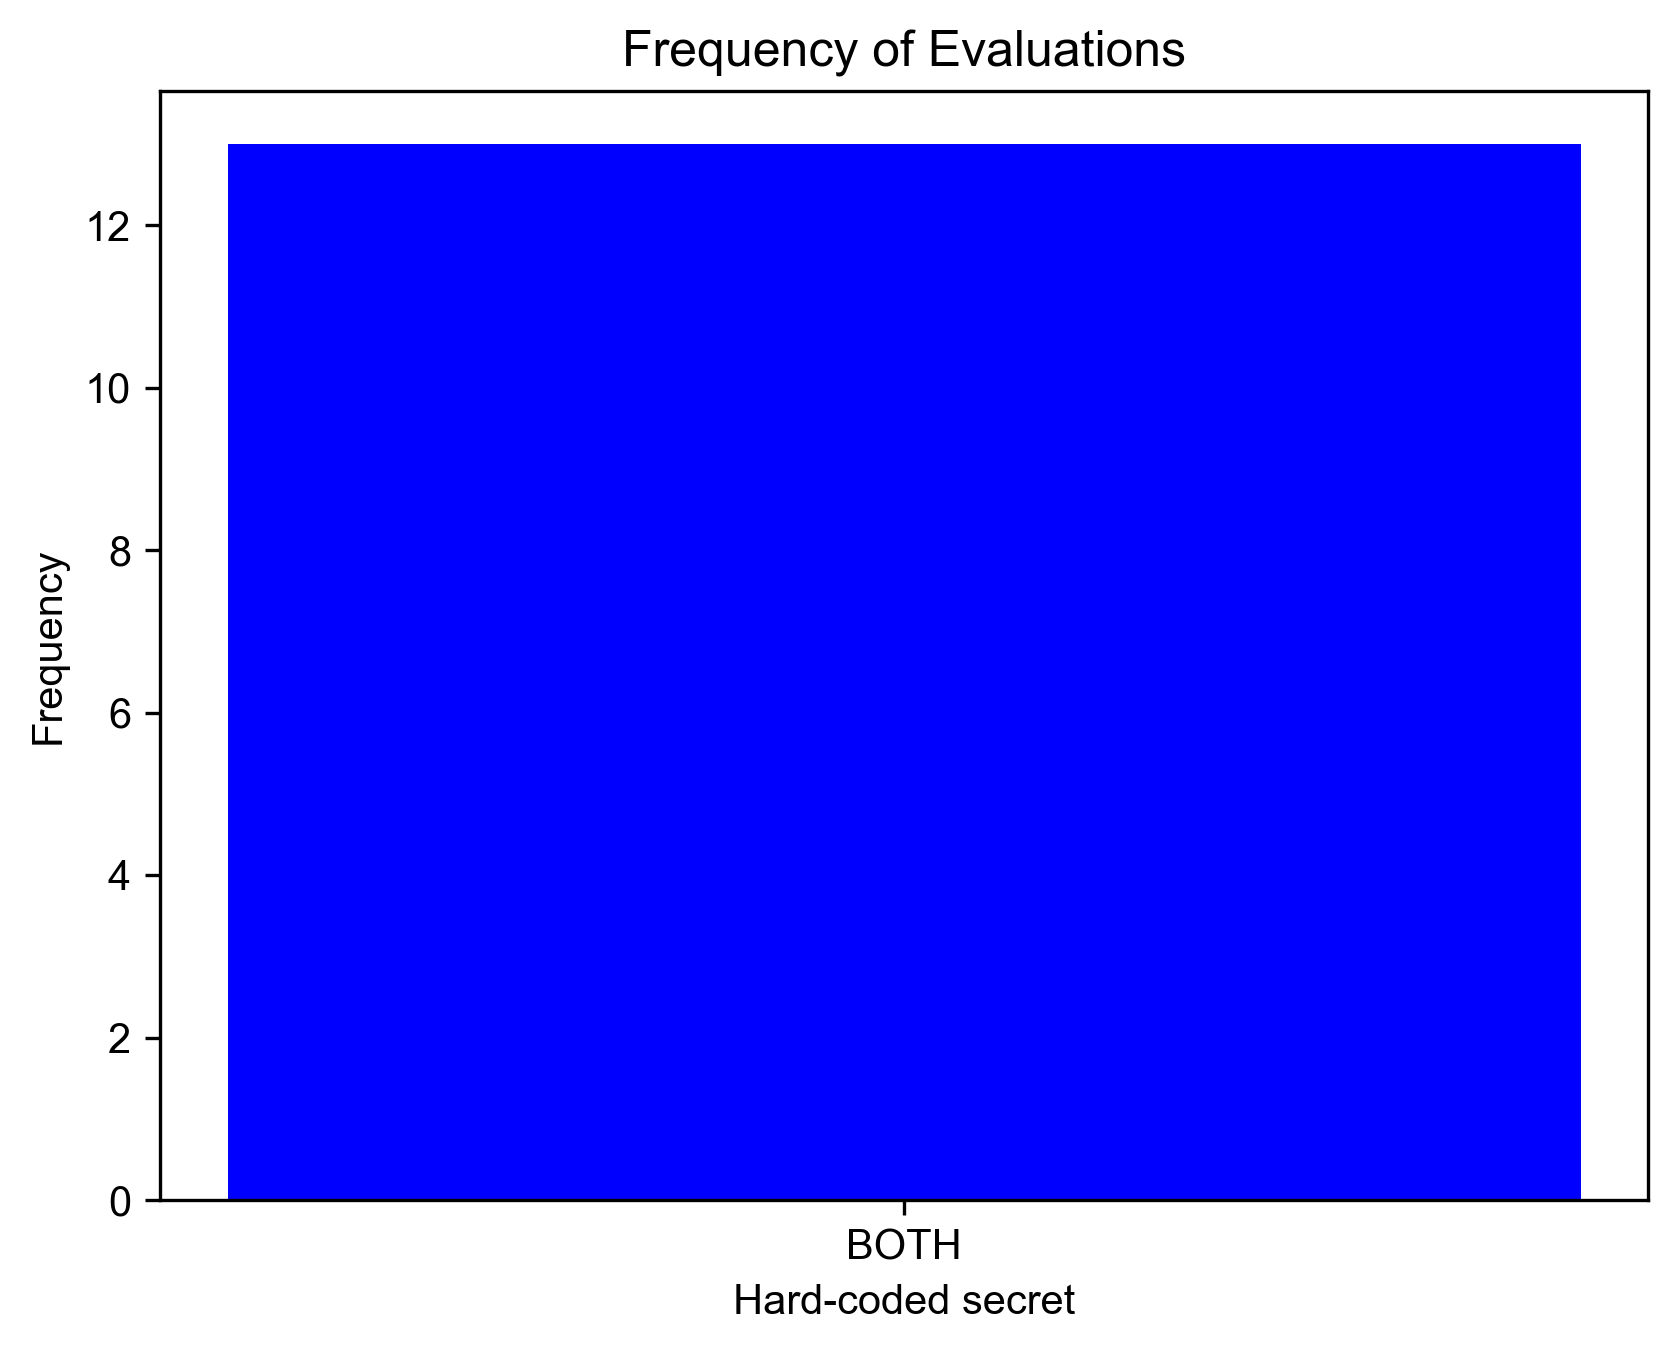

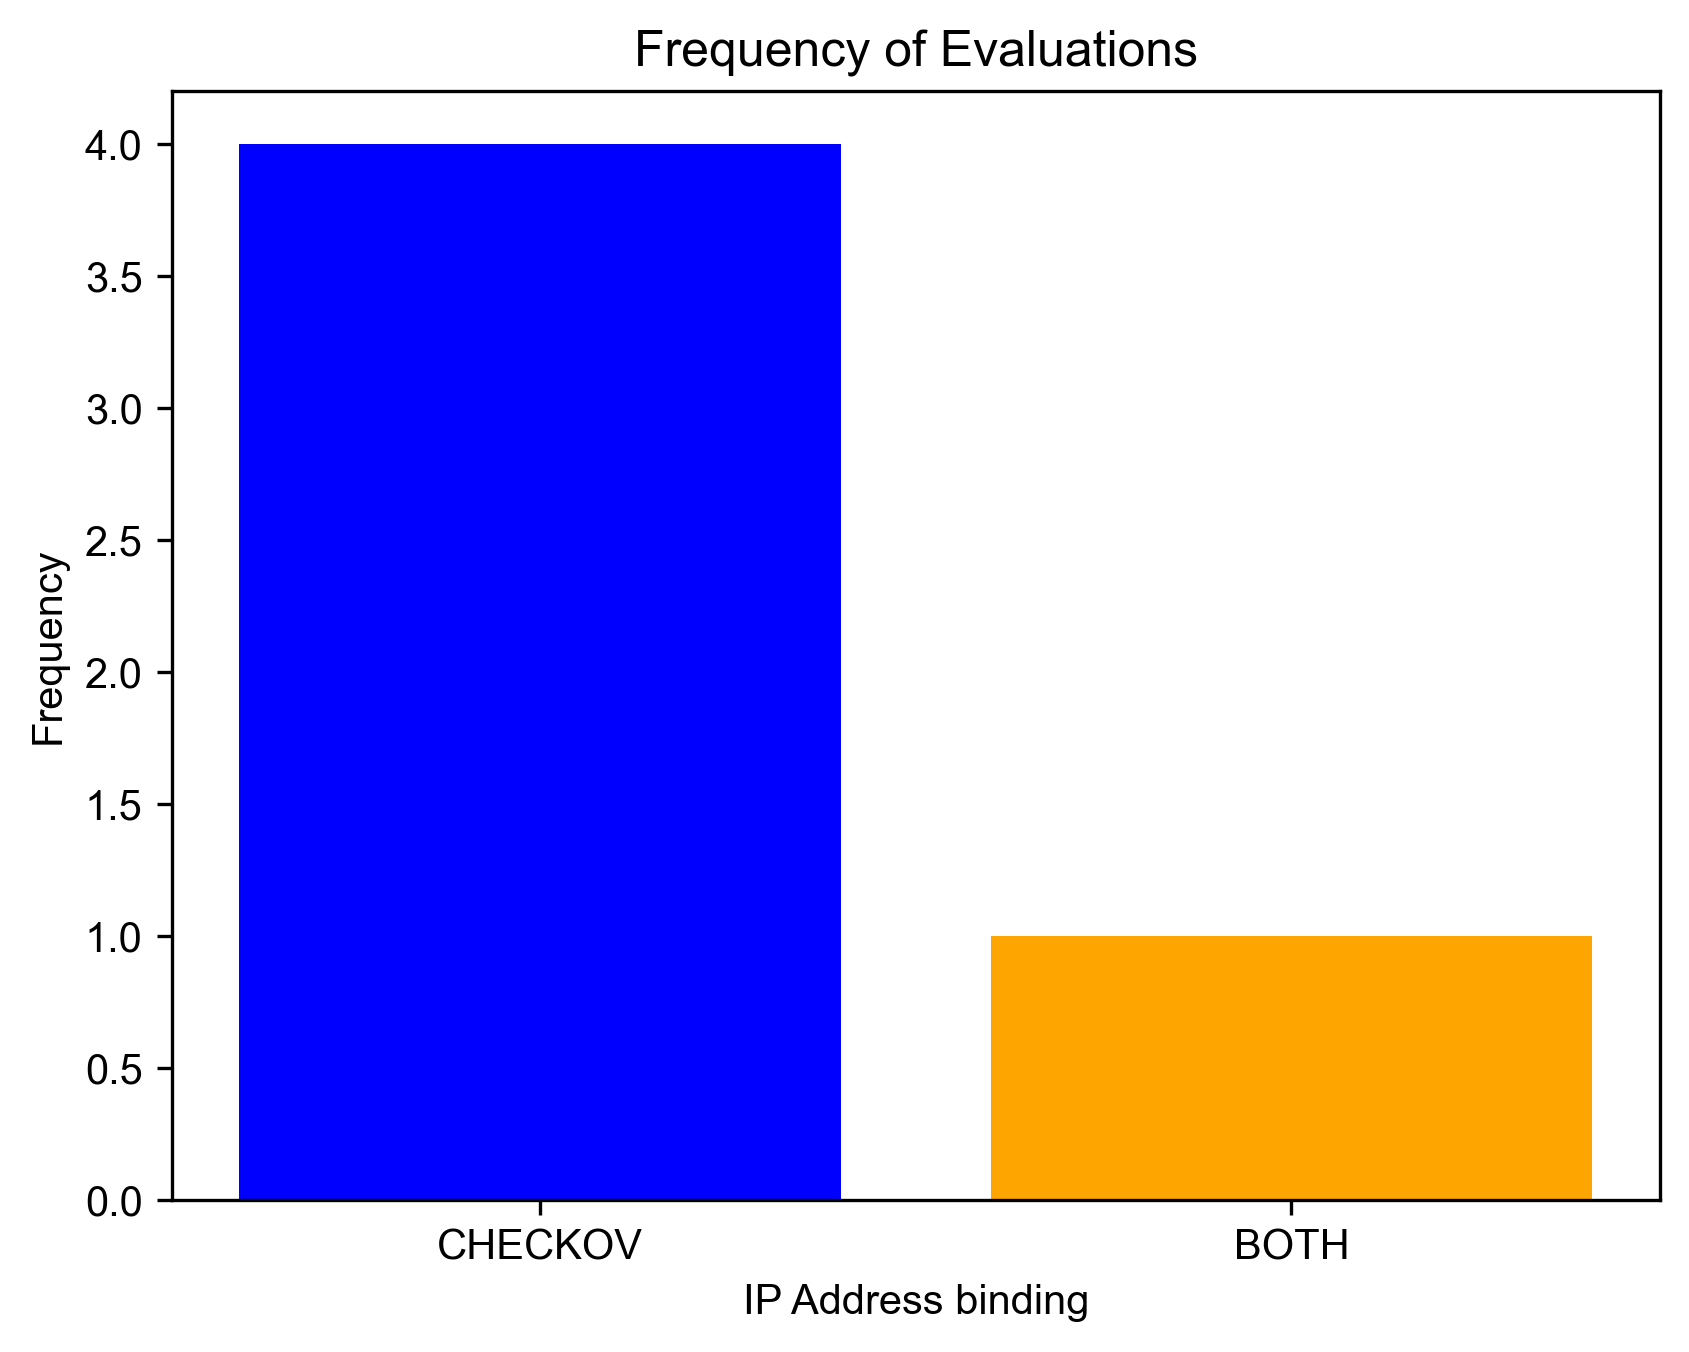

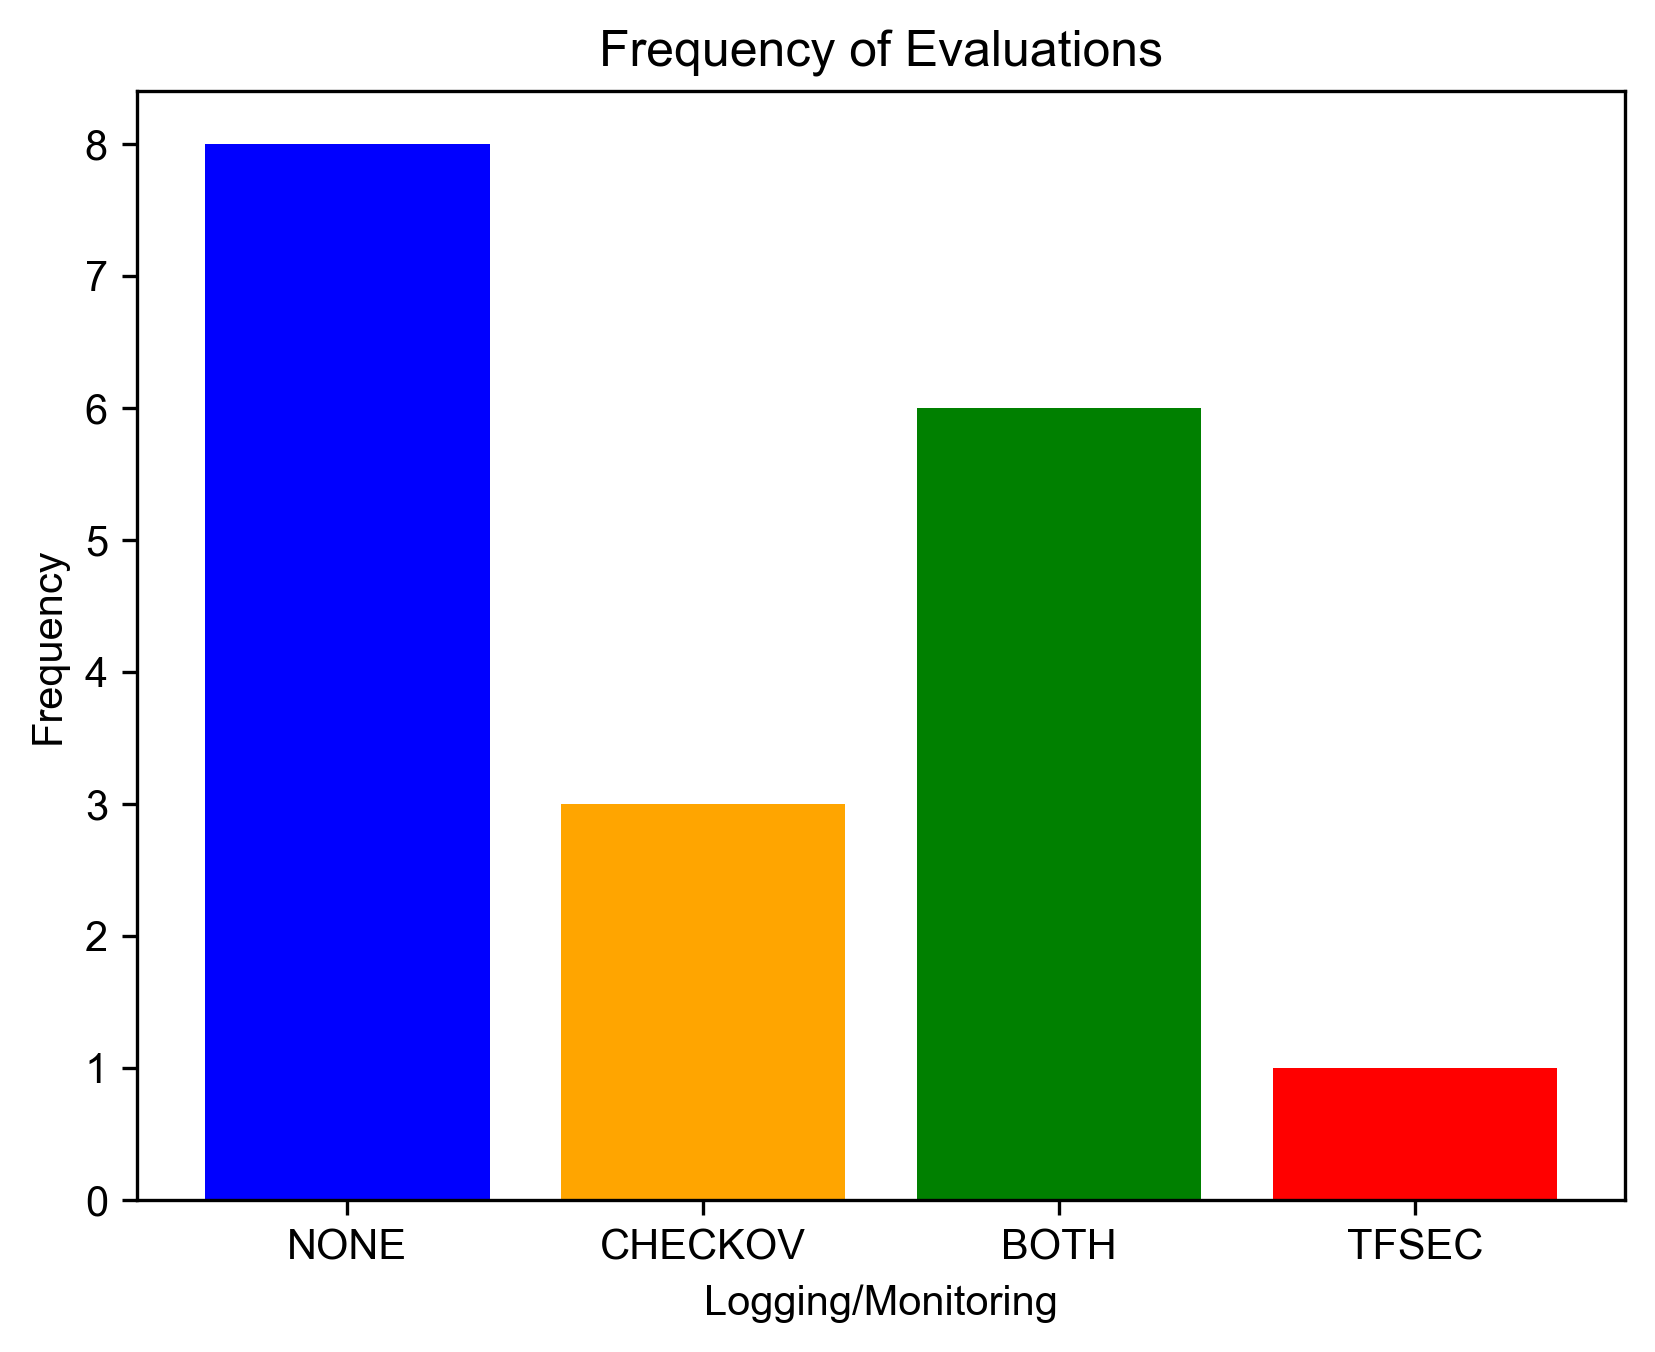

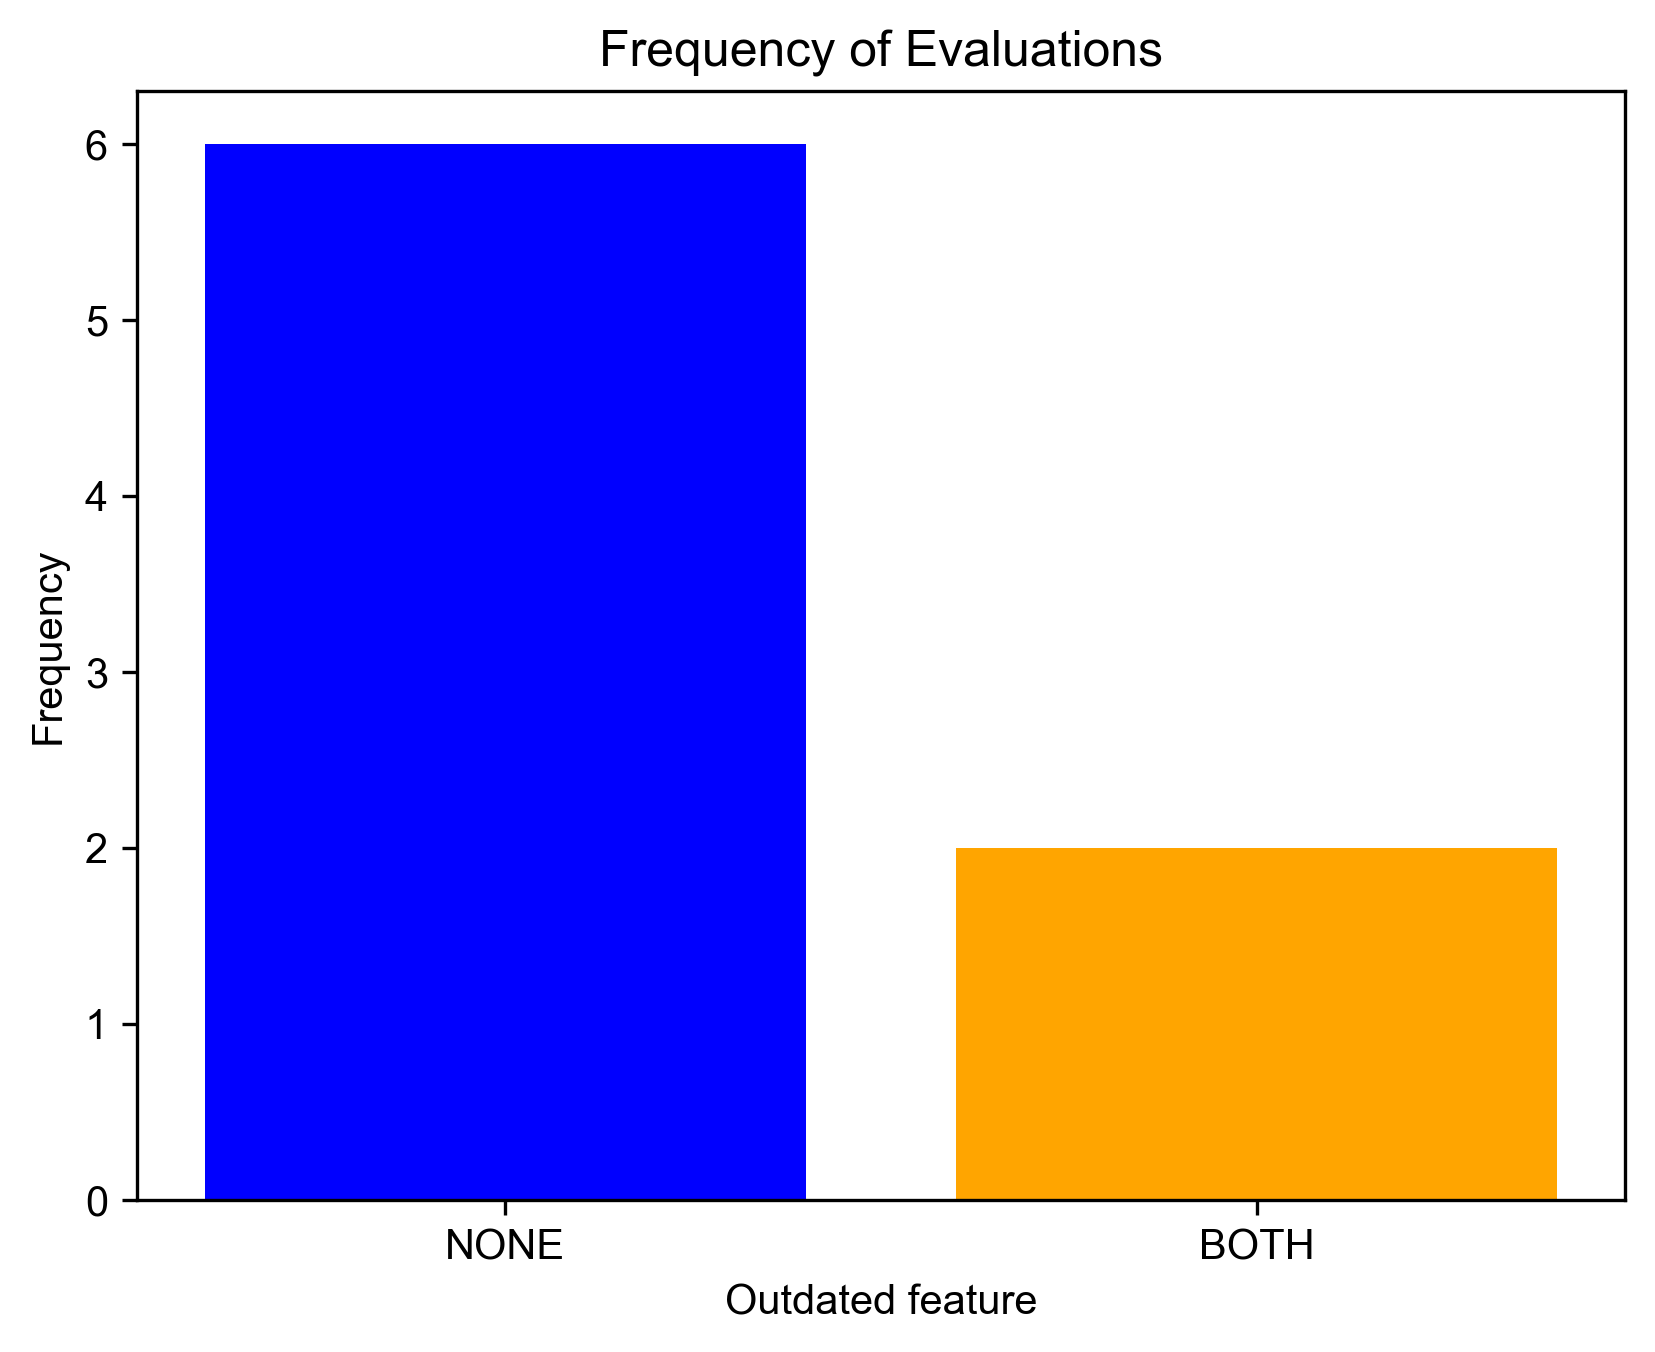

In [22]:
#False negatives of the tools: Checkov related to tfsec, and vice-versa
#Perform the analyze based on the categories. For each category, generate a chart.
import matplotlib.pyplot as plt

results_tfsec = {}
results_checkov = {}
with open(RESULTS_FILE_TFSEC, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        repo_name = s_row[0]
        passed_check = s_row[3].split(";")
        failed_check = s_row[4].split(";")

        results_tfsec[repo_name] = [passed_check, failed_check]

with open(RESULTS_FILE_AZURE, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        repo_name = s_row[0]
        passed_check = s_row[3].split(";")
        failed_check = s_row[4].split(";")

        results_checkov[repo_name] = [passed_check, failed_check]

for category in categories:
    target_policies = categories.get(category)
    output = []
    for project in results_checkov:
        result_project_tfsec = results_tfsec.get(project)
        result_project_checkov = results_checkov.get(project)
        if result_project_tfsec is not None and result_project_checkov is not None:
            for policy in policies_checkov:
                tfsec_pol_id = policies_tfsec.get(policy)[0]
                checkov_pol_id = policies_checkov.get(policy)[0]
                evaluation = ""
                if checkov_pol_id in target_policies:
                    if (checkov_pol_id in result_project_checkov[0] and not checkov_pol_id in result_project_checkov[1]) \
                            and (tfsec_pol_id in result_project_tfsec[0] and not tfsec_pol_id in result_project_tfsec[1]):
                        evaluation = "BOTH"
                    if (checkov_pol_id in result_project_checkov[0] and not checkov_pol_id in result_project_checkov[1]) \
                                and (tfsec_pol_id in result_project_tfsec[1] and not tfsec_pol_id in result_project_tfsec[0]):
                        evaluation = "CHECKOV"
                    if (checkov_pol_id in result_project_checkov[1] and not checkov_pol_id in result_project_checkov[0]) \
                            and (tfsec_pol_id in result_project_tfsec[0] and not tfsec_pol_id in result_project_tfsec[1]):
                        evaluation = "TFSEC"
                    if (checkov_pol_id in result_project_checkov[1] and not checkov_pol_id in result_project_checkov[0]) \
                            and (tfsec_pol_id in result_project_tfsec[1] and not tfsec_pol_id in result_project_tfsec[0]):
                        evaluation = "NONE"
                    
                    if evaluation != "":
                        output.append([project, policy, evaluation])
                        
    # Count the frequency of each evaluation
    evaluation_counts = {}
    for project_name, policy_id, evaluation in output:
        if evaluation in evaluation_counts:
            evaluation_counts[evaluation] += 1
        else:
            evaluation_counts[evaluation] = 1
    
    # Prepare data for plotting
    evaluations = list(evaluation_counts.keys())
    counts = list(evaluation_counts.values())
    
    # Create the bar chart
    plt.bar(evaluations, counts, color=['blue', 'orange', 'green', 'red'])
    plt.xlabel(category)
    plt.ylabel('Frequency')
    plt.title('Frequency of Evaluations')
    plt.show()

    import csv

    with open('./csv/comparison/'+category.replace("/","-")+'.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # Write header
        writer.writerow(['Project Name', 'Policy ID', 'Evaluation'])

        # Write data
        writer.writerows(output)
